<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np

class KMeansNumpy:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def initialize_centroids(self, X):
        idx = np.random.choice(len(X), self.k, replace=False)
        return X[idx]

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, None] - self.centroids[None, :], axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.k):
            points = X[labels == i]
            if len(points) > 0:
                new_centroids.append(points.mean(axis=0))
            else:
                new_centroids.append(self.centroids[i])
        return np.array(new_centroids)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            labels = self.assign_clusters(X)
            self.centroids = self.update_centroids(X, labels)

            if np.allclose(old_centroids, self.centroids):
                break

        return labels, self.centroids


In [27]:
import numpy as np

def silhouette_score_numpy(X, labels):
    n = len(X)
    unique_clusters = np.unique(labels)
    k = len(unique_clusters)
    silhouettes = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == c] for c in unique_clusters if c != labels[i]]

        # a(i): intra-cluster distance
        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))

        # b(i): nearest-cluster distance
        b = np.min([
            np.mean(np.linalg.norm(cluster - X[i], axis=1))
            for cluster in other_clusters
        ])

        silhouettes.append((b - a) / max(a, b))

    return np.mean(silhouettes)


In [28]:
import matplotlib.pyplot as plt

def plot_clusters(X, labels, centroids, k):
    for i in range(k):
        cluster = X[labels == i]
        plt.scatter(cluster[:,0], cluster[:,1], label=f"Cluster {i}")

    plt.scatter(centroids[:,0], centroids[:,1], marker="*", s=200, color="black", label="Centroids")
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()
    plt.show()


Silhouette Score: 0.6672939008345414


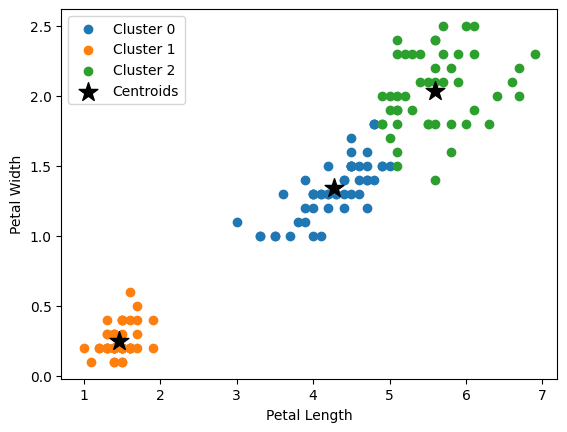

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset from sklearn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Use 'petal length (cm)' and 'petal width (cm)' directly from the loaded data
X = df[['petal length (cm)', 'petal width (cm)']].values

model = KMeansNumpy(k=3)
labels, centroids = model.fit(X)

score = silhouette_score_numpy(X, labels)
print("Silhouette Score:", score)

plot_clusters(X, labels, centroids, 3)